# Preliminary EDA

In [2]:
from pyforest import *

## Default Rate Data

In [3]:
dRate = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/cohortDefault2016/peps300.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [4]:
# data preprocessing for readability and uniformity
dRate.columns = dRate.columns.str.replace("\n", "")
dRate.columns = dRate.columns.str.replace(" ", "")
dRate.head()

,OPEID,Name,Address,City,State,StateDesc,ZipCode,ZipExt,ProgLength,SchoolType,...,Year2,Num2,Denom2,DRate2,PRate2,Year3,Num3,Denom3,DRate3,PRate3
0,1002,ALABAMA AGRICULTURAL & MECHANICAL UNIVERSITY ...,4900 MERIDIAN STREET ...,NORMAL,AL,ALABAMA ...,35762,1357,8,1,...,2015,378.0,1902.0,19.8,A,2014,332.0,1753.0,18.9,A
1,1003,FAULKNER UNIVERSITY ...,5345 ATLANTA HIGHWAY ...,MONTGOMERY,AL,ALABAMA ...,36109,3398,8,2,...,2015,180.0,1471.0,12.2,A,2014,192.0,1470.0,13.0,A
2,1004,UNIVERSITY OF MONTEVALLO ...,PALMER CIRCLE ...,MONTEVALLO,AL,ALABAMA ...,35115,6000,8,1,...,2015,72.0,784.0,9.1,A,2014,64.0,793.0,8.0,A
3,1005,ALABAMA STATE UNIVERSITY ...,915 SOUTH JACKSON STREET ...,MONTGOMERY,AL,ALABAMA ...,36104,5714,8,1,...,2015,466.0,2208.0,21.1,P,2014,471.0,2419.0,19.4,P
4,1007,CENTRAL ALABAMA COMMUNITY COLLEGE ...,1675 CHEROKEE ROAD ...,ALEXANDER CITY,AL,ALABAMA ...,35010,0,5,1,...,2015,131.0,579.0,22.6,P,2014,184.0,674.0,27.2,P


### Default Rates for all Schools

In [5]:
# find min and max default values
dRate['DRate1'].describe()

count    4811.000000
mean        9.772584
std         7.486622
min         0.000000
25%         4.050000
50%         8.100000
75%        14.400000
max        66.600000
Name: DRate1, dtype: float64

In [6]:
# list labels
dRate.columns

Index(['OPEID', 'Name', 'Address', 'City', 'State', 'StateDesc', 'ZipCode',
       'ZipExt', 'ProgLength', 'SchoolType', 'Year1', 'Num1', 'Denom1',
       'DRate1', 'PRate1', 'EthnicCode', 'CongDis', 'Region',
       'AverageorGreaterthan30', 'Year2', 'Num2', 'Denom2', 'DRate2', 'PRate2',
       'Year3', 'Num3', 'Denom3', 'DRate3', 'PRate3'],
      dtype='object')

In [7]:
# make copy of dataset for manipulation
dRateCopy = dRate.copy()

# replace numbered values for schoolType with strings.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
dRateCopy.loc[(dRateCopy.SchoolType == 1),'SchoolType']='Public'
dRateCopy.loc[(dRateCopy.SchoolType == 2),'SchoolType']='Private'
dRateCopy.loc[(dRateCopy.SchoolType == 3),'SchoolType']='Proprietary'
dRateCopy.loc[(dRateCopy.SchoolType == 5),'SchoolType']='Foreign'
dRateCopy.loc[(dRateCopy.SchoolType == 6),'SchoolType']='Foreign'
dRateCopy.loc[(dRateCopy.SchoolType == 7),'SchoolType']='Foreign'

# remove foreign schools
dRateCopy = dRateCopy[dRateCopy.SchoolType != 'Foreign']

In [8]:
# export dataset for modeling
# dRateCopy.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/cohortDefault2016/dRateTyped.csv', index=False)

In [9]:
# group by school type
dRateGrouped = dRateCopy.groupby('SchoolType')
dRatePublic = dRateGrouped.get_group('Public')
dRateNonprofit = dRateGrouped.get_group('Private')
dRateProprietary = dRateGrouped.get_group('Proprietary')

### Default Rates for Public Schools

In [10]:
# find min and max default values
dRatePublic['DRate1'].describe()

count    1583.000000
mean       11.880543
std         6.282601
min         0.000000
25%         6.900000
50%        11.700000
75%        16.200000
max        43.800000
Name: DRate1, dtype: float64

### Default Rates for Private, Nonprofit Schools

In [11]:
dRateNonprofit['DRate1'].describe()

count    1510.000000
mean        6.347152
std         5.869980
min         0.000000
25%         2.400000
50%         4.800000
75%         8.200000
max        50.000000
Name: DRate1, dtype: float64

### Default Rates for Proprietary Schools

In [12]:
dRateProprietary['DRate1'].describe()

count    1386.000000
mean       12.412626
std         8.424456
min         0.000000
25%         6.400000
50%        11.100000
75%        16.900000
max        66.600000
Name: DRate1, dtype: float64

### Visualizations

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

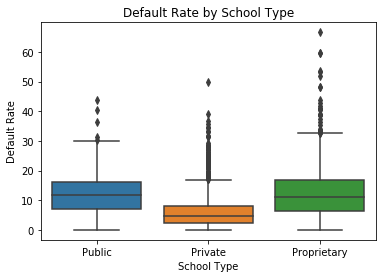

In [15]:
# Box Plot of Default Rates by School Type
bx1 = sns.boxplot(x='SchoolType', y='DRate1', data=dRateCopy)
bx1.set(xlabel = 'School Type', ylabel = 'Default Rate')
bx1.set_title('Default Rate by School Type')
plt.show()

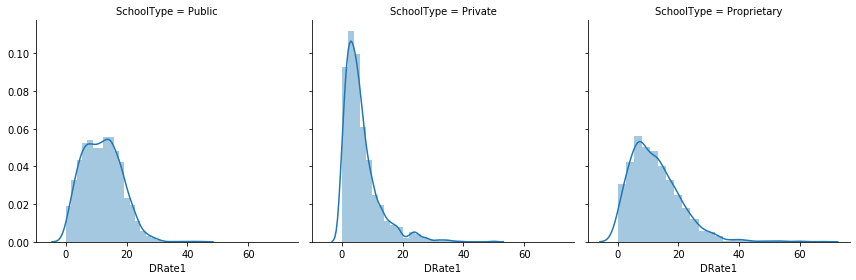

In [15]:
# comparison of distribution of default rate by institution type
dRateDistsFacet = sns.FacetGrid(dRateCopy, col="SchoolType", height=4, aspect=1)
dRateDistsFacet = dRateDistsFacet.map(sns.distplot, "DRate1", bins=25)

## Census Data

In [16]:
# AL-MO
censusALMO = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/census2010/stco-mr2010_al_mo.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [17]:
# list labels
censusALMO.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

In [18]:
# MT-WY
censusMTWY = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/census2010/stco-mr2010_mt_wy.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [19]:
# list labels
censusMTWY.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

In [20]:
# Join Census Datasets
censusCombined = pd.concat([censusALMO, censusMTWY], axis=0)

<IPython.core.display.Javascript object>

In [21]:
# list combined labels to ensure concat success
censusCombined.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

In [22]:
# Export combined census data to CSV
# censusCombined.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/census2010/censusCombined.csv', index=False)

In [23]:
# import combined dataset to increase modularity of notebook
censusData = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/census2010/censusCombined.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

In [24]:
# labels of combined dataset
censusData.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'SEX', 'ORIGIN',
       'AGEGRP', 'IMPRACE', 'RESPOP'],
      dtype='object')

In [25]:
# counts by state
stateTotals = censusData['STATE'].value_counts()
stateTotals.sort_index()

1     26782
2     10344
4     11716
5     24766
6     58552
8     25789
9      7301
10     2623
11     1211
12    45675
13    61026
15     6136
16    14443
17    37183
18    33313
19    25911
20    27959
21    32895
22    26657
23     6467
24    16682
25    11979
26    35260
27    28653
28    24992
29    36270
30    12407
31    17969
32     8696
33     4936
34    19765
35    15641
36    40838
37    49502
38     8993
39    39665
40    31390
41    20235
42    35011
44     3544
45    22357
46    12147
47    34201
48    97232
49    11757
50     4828
51    54910
53    25653
54    14623
55    26708
56     7179
Name: STATE, dtype: int64